In [0]:
import numpy as np
import pandas as pd

Cargar dataset

In [0]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['spam.csv']))
dataset.head()

Mail  Class  ...  Unnamed: 6  Unnamed: 7
0                       component       0  ...         NaN         NaN
1                   Offer expires       1  ...         NaN         NaN
2  One hundred percent guaranteed       1  ...         NaN         NaN
3                         concept       0  ...         NaN         NaN
4                           brief       0  ...         NaN         NaN

[5 rows x 8 columns]

Ver frecuencias de clase

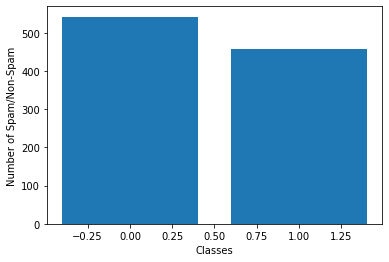

In [0]:
spam_count=dataset.groupby('Class').count()
from matplotlib import pyplot as plt
plt.bar(spam_count.index.values, spam_count['Mail'])
plt.xlabel('Classes')
plt.ylabel('Number of Spam/Non-Spam')
plt.show()

Pre-procesamiento

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)
text_counts= cv.fit_transform(dataset['Mail'])
print(text_counts.shape)

(1000, 131)


**Clasificador Bayesiano**

Constriur los conjuntos de entrenamiento y prueba

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, dataset['Class'], test_size=0.3, random_state=1)

print(X_train)

  (0, 49)	1
  (1, 106)	1
  (1, 68)	1
  (2, 107)	1
  (2, 71)	1
  (3, 17)	1
  (4, 107)	1
  (4, 71)	1
  (5, 118)	1
  (6, 1)	1
  (7, 2)	1
  (8, 84)	1
  (8, 83)	1
  (8, 3)	1
  (10, 92)	1
  (10, 67)	1
  (11, 27)	1
  (12, 1)	1
  (13, 40)	1
  (14, 22)	1
  (15, 32)	1
  (16, 42)	1
  (17, 29)	1
  (18, 88)	1
  (18, 126)	1
  :	:
  (687, 84)	1
  (687, 83)	1
  (687, 3)	1
  (688, 90)	1
  (688, 59)	1
  (689, 35)	1
  (690, 27)	1
  (691, 94)	1
  (691, 60)	1
  (692, 30)	1
  (693, 92)	1
  (693, 67)	1
  (694, 104)	1
  (694, 124)	1
  (695, 110)	1
  (695, 108)	1
  (695, 122)	1
  (696, 91)	1
  (696, 74)	1
  (696, 76)	1
  (696, 80)	1
  (696, 75)	1
  (697, 14)	1
  (698, 49)	1
  (699, 21)	1


Instanciar el clasificador Bayesiano

In [0]:
import nltk.classify.util
from sklearn.naive_bayes import MultinomialNB # Discrete features
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Entrenar el clasificador
clf = MultinomialNB().fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier #for decision tree
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Probar la clasificacion del modelo

In [0]:
y_pred= clf.predict(X_test)
m=confusion_matrix(y_test, y_pred)
print(m)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, y_pred))

y_pred= dt.predict(X_test)
m=confusion_matrix(y_test, y_pred)
print(m)
print("DT Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[139  11]
 [ 19 131]]
MultinomialNB Accuracy: 0.9
[[139  11]
 [ 17 133]]
DT Accuracy: 0.9066666666666666
